# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

## Imports 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
sns.set()

## Open datas 

In [2]:
dataPath ='/'.join(os.getcwd().split("/")[:-1])+"/data/"

### Oil production

In [3]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [4]:
def clean (df, unite) :
    indexUSSR = np.where(df[unite]=="USSR")[0][0]
    indexRussie = np.where(df[unite]=="Russian Federation")[0][0]
    df.iloc[indexUSSR] = df.iloc[indexUSSR].fillna(0) + df.iloc[indexRussie].fillna(0)
    df = df.dropna(thresh= len(df.columns)-20).fillna(0)
    return df

def separate_total(df, unite) :
    df_tot = pd.DataFrame(df[df[unite].str.contains("Total")]).set_index(unite)
    df = df[df[unite].str.contains("Total") == False].set_index(unite)
    return df_tot, df

def print_df(df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,pays in enumerate(df.index) :   
        plt.plot(df.columns.values[:-5], df.iloc[k][:-5], label=f"{pays}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()
    
def set_name_df(df,name) :
    df.name = name
    return df

In [5]:
unite = "Million tonnes"
oil_production = clean(oil_production,unite)
oil_production_total, oil_production = separate_total(oil_production,unite)
oil_production_total, oil_production = set_name_df(oil_production_total, "Total oil"), set_name_df(oil_production_total, "Oil")

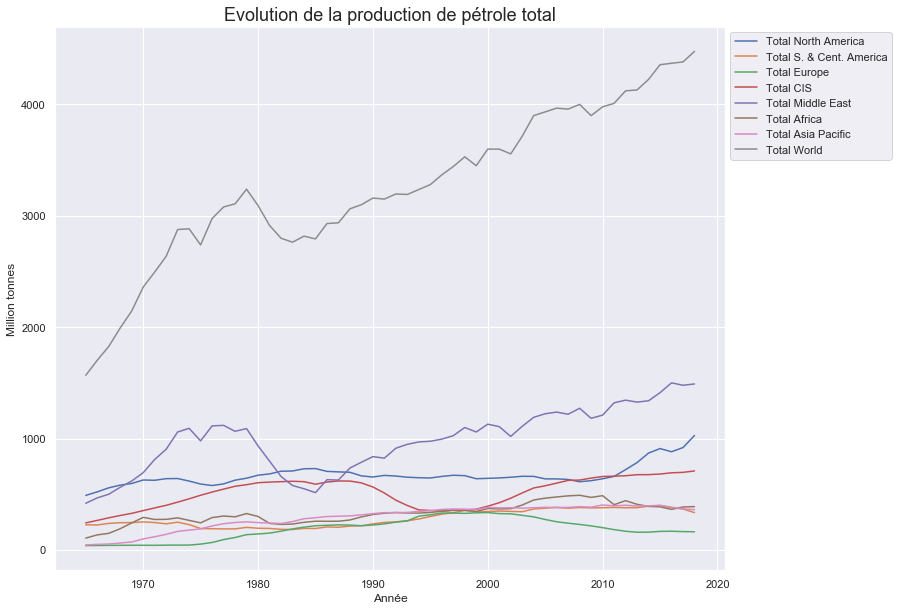

In [6]:
print_df(oil_production_total, "Evolution de la production de pétrole total", unite)

### Gaz production

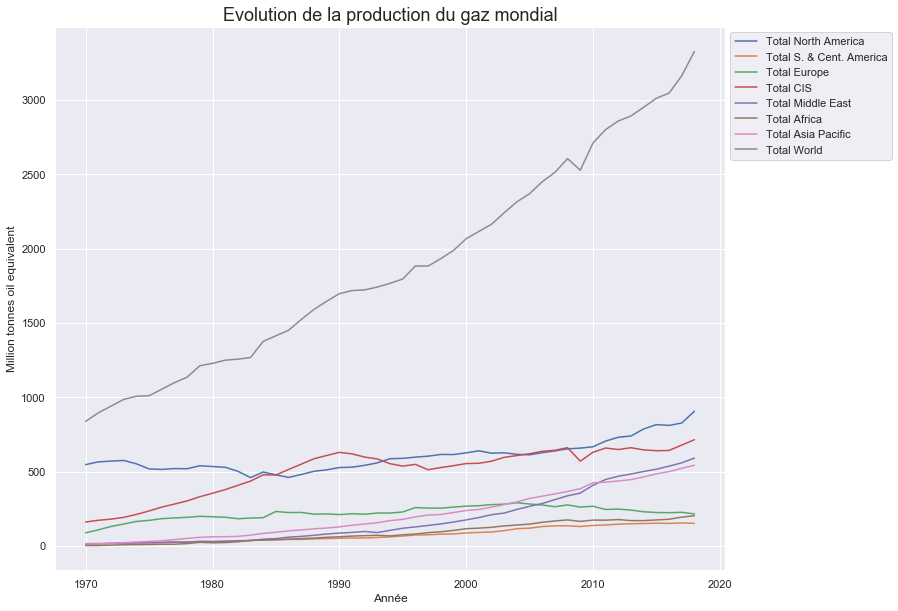

In [7]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 5, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production, unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)
gaz_production_total, gaz_production = set_name_df(gaz_production_total, "Total gaz"), set_name_df(gaz_production_total, "gaz")
print_df(gaz_production_total, "Evolution de la production du gaz mondial", unite)

### Coal production 

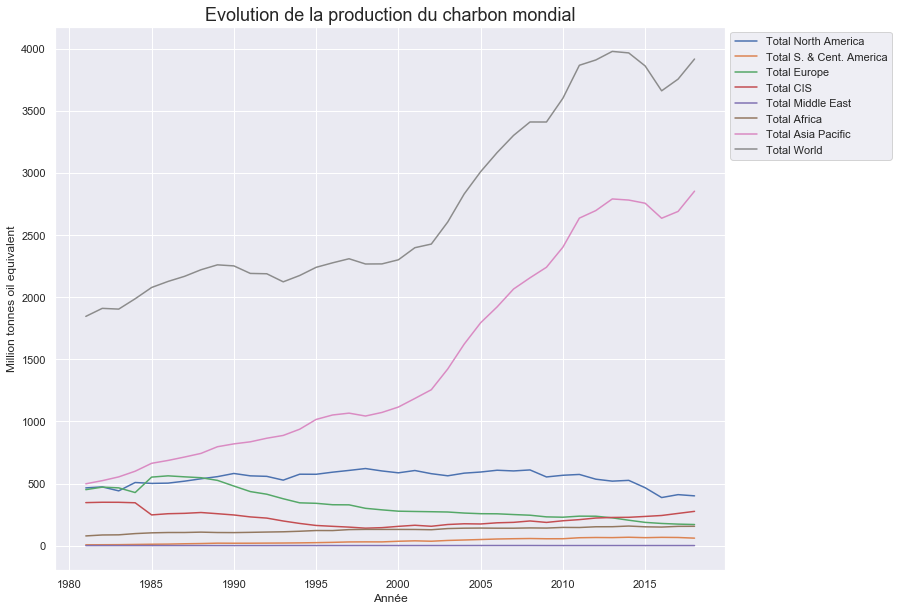

In [8]:
coal_production = pd.read_excel(dataPath+"data_production.xlsx", 7, header = 2)
unite = "Million tonnes oil equivalent"
coal_production = clean(coal_production,unite)
coal_production_total, coal_production = separate_total(coal_production, unite)
coal_production_total, coal_production = set_name_df(coal_production_total, "Total coal"), set_name_df(coal_production_total, "coal")
print_df(coal_production_total, "Evolution de la production du charbon mondial", unite)

### Nuclear : 

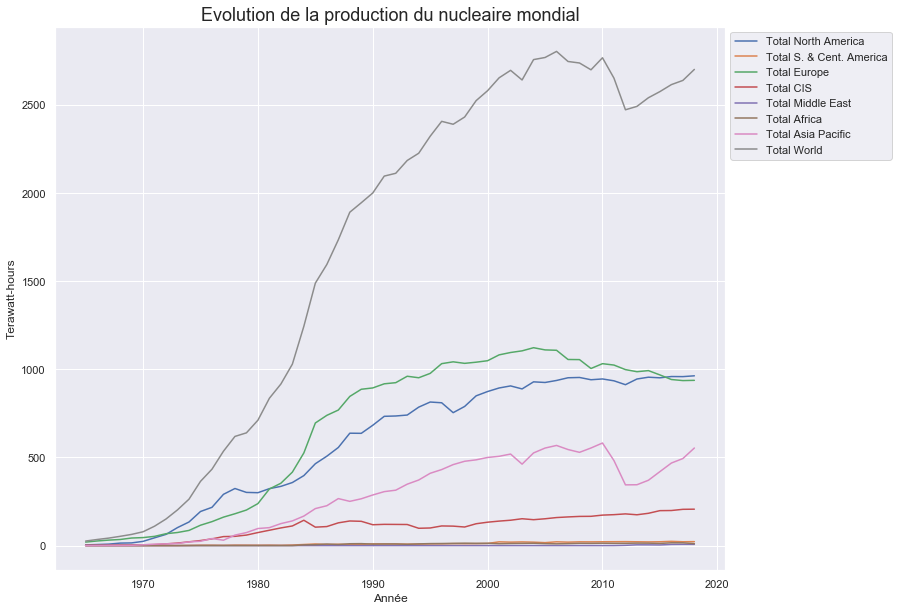

In [9]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 8, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)
nuclear_production_total, nuclear_production = set_name_df(nuclear_production_total, "Total nuclear"), set_name_df(nuclear_production_total, "nuclear")
print_df(nuclear_production_total, "Evolution de la production du nucleaire mondial", unite)

### Hydro-generation 

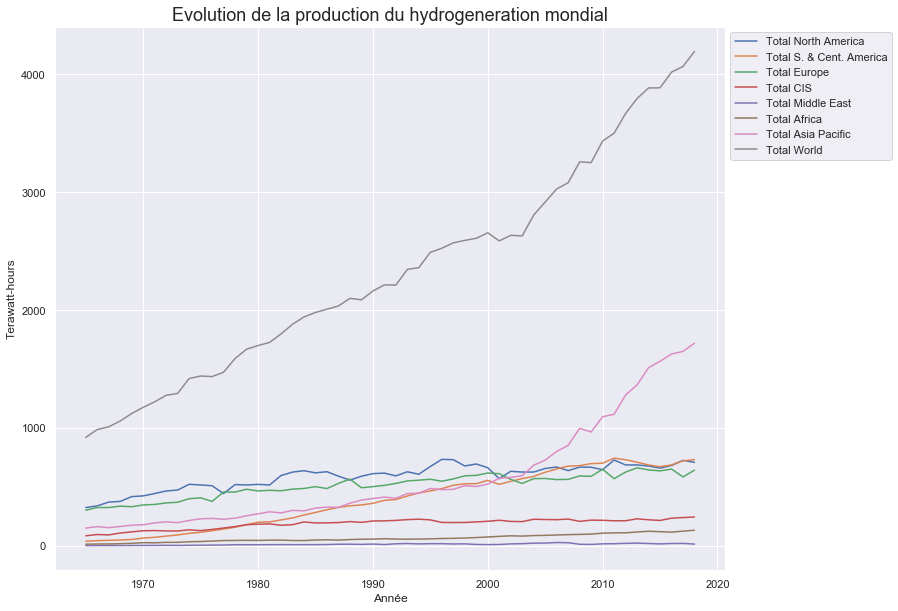

In [10]:
hydro_production = pd.read_excel(dataPath+"data_production.xlsx", 9, header = 2)
unite = "Terawatt-hours"
hydro_production = clean(hydro_production,unite)
hydro_production_total, hydro_production = separate_total(hydro_production, unite)
hydro_production_total, hydro_production = set_name_df(hydro_production_total, "Total hydro"), set_name_df(hydro_production_total, "hydro")
print_df(hydro_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Energie renouvelable : 


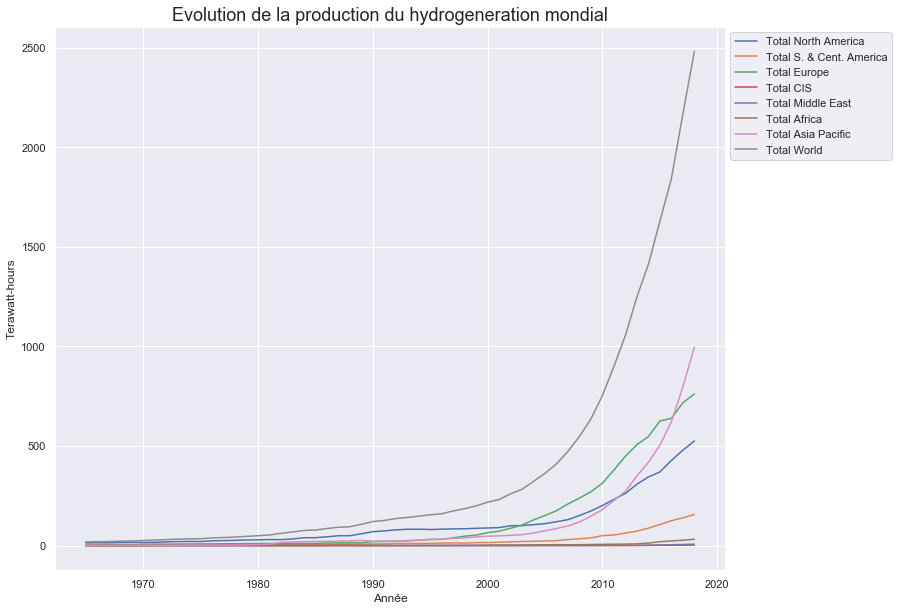

In [11]:
renewable_production = pd.read_excel(dataPath+"data_production.xlsx", 10, header = 2)
unite = "Terawatt-hours"
renewable_production = clean(renewable_production,unite)
renewable_production_total, renewable_production = separate_total(renewable_production, unite)
renewable_production_total, renewable_production = set_name_df(renewable_production_total, "Total renewable"), set_name_df(renewable_production_total, "renewable")
print_df(renewable_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Solaire : 


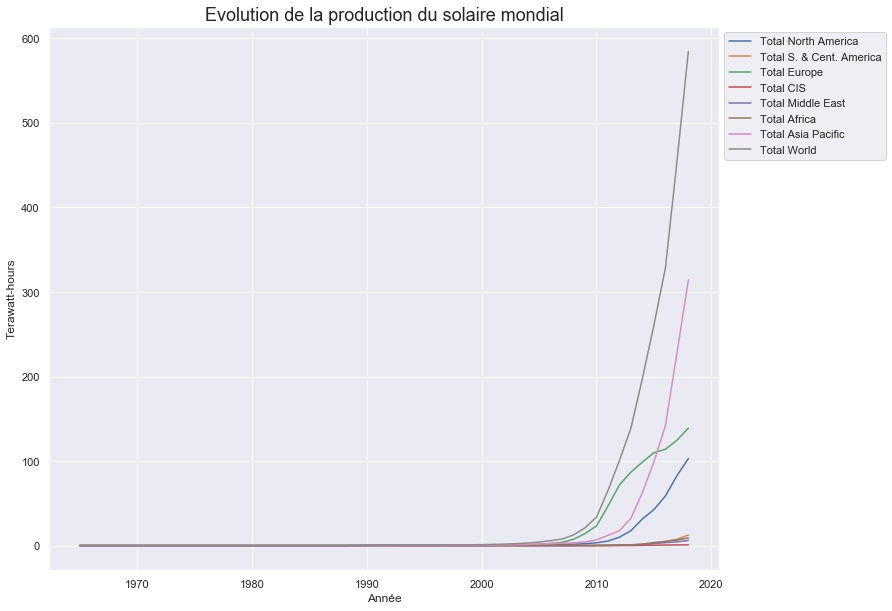

In [12]:
solar_production = pd.read_excel(dataPath+"data_production.xlsx", 12, header = 2)
unite = "Terawatt-hours"
solar_production = clean(solar_production,unite)
solar_production_total, solar_production = separate_total(solar_production, unite)
solar_production_total, solar_production = set_name_df(solar_production_total, "Total solar"), set_name_df(solar_production_total, "solar")
print_df(solar_production_total, "Evolution de la production du solaire mondial", unite)

### Wind 

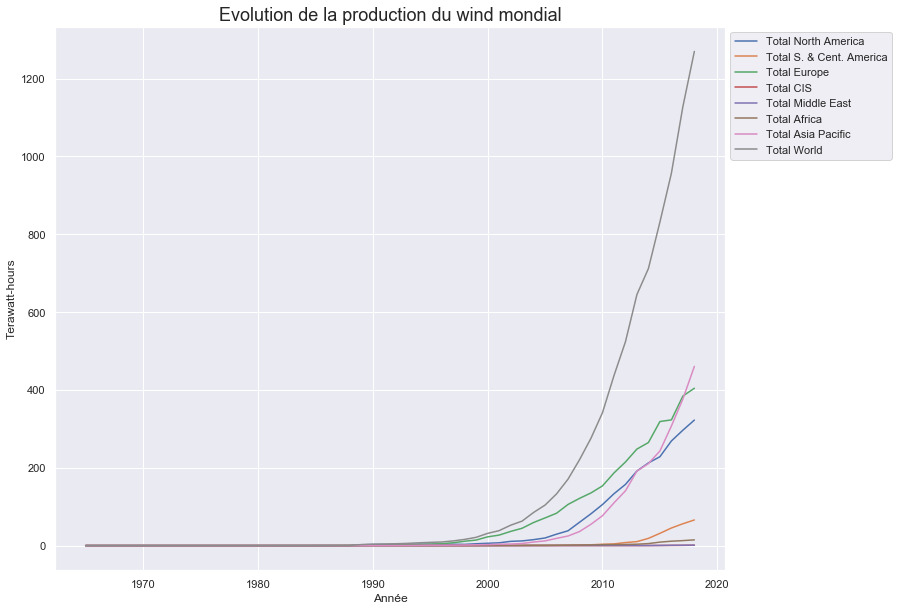

In [13]:
wind_production = pd.read_excel(dataPath+"data_production.xlsx", 13, header = 2)
unite = "Terawatt-hours"
wind_production = clean(wind_production,unite)
wind_production_total, wind_production = separate_total(wind_production, unite)
wind_production_total, wind_production = set_name_df(wind_production_total, "Total wind"), set_name_df(wind_production_total, "wind")

print_df(wind_production_total, "Evolution de la production du wind mondial", unite)

### Biomass :

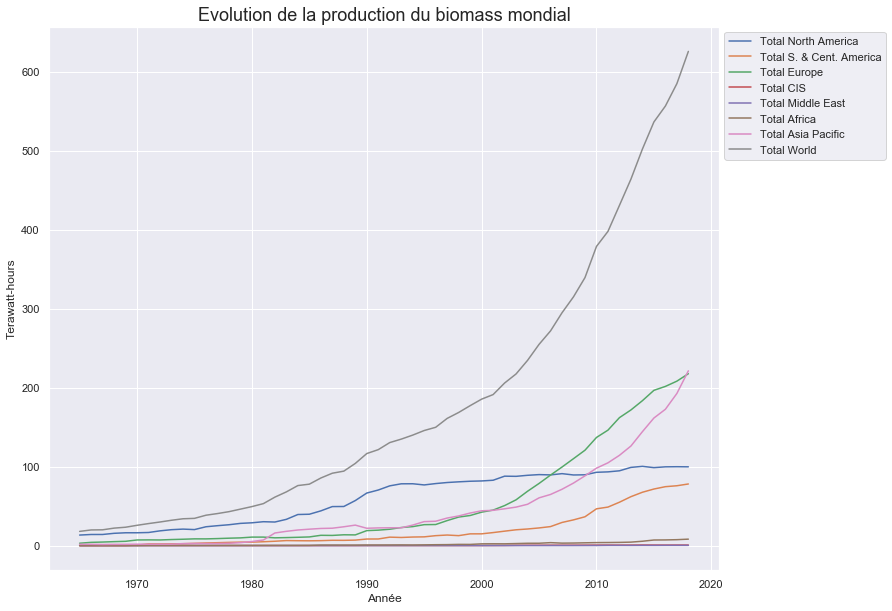

In [14]:
biomass_production = pd.read_excel(dataPath+"data_production.xlsx", 14, header = 2)
unite = "Terawatt-hours"
biomass_production = clean(biomass_production,unite)
biomass_production_total, biomass_production = separate_total(biomass_production, unite)
biomass_production_total, biomass_production = set_name_df(biomass_production_total, "Total biomass"), set_name_df(biomass_production_total, "biomass")

print_df(biomass_production_total, "Evolution de la production du biomass mondial", unite)

### Total :

In [15]:
def print_tot(list_df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,df in enumerate(list_df) :   
        plt.plot(df.columns.values[:-5], df.iloc[-1][:-5], label=f"{df.name}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()

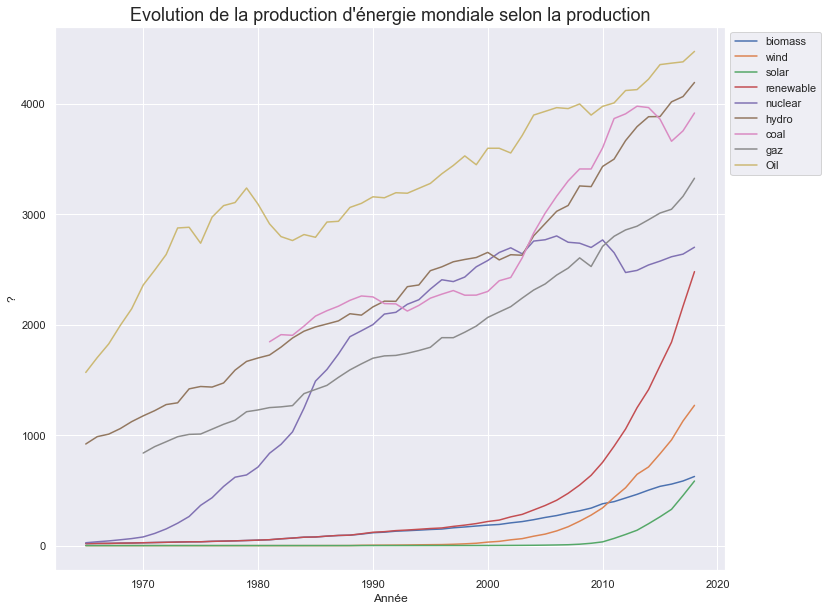

In [16]:
dfs= [biomass_production,wind_production,solar_production, renewable_production, 
           nuclear_production, hydro_production,coal_production, gaz_production, oil_production]
print_tot(dfs,
         title = "Evolution de la production d'énergie mondiale selon la production", 
         unite="?")

In [17]:
def reshape_data (df) :
    
    df_copy = df
    df_copy = df_copy.T
    df_copy = df_copy.reset_index()
    df_copy = df_copy [:-5]
    header = np.array(df_copy.columns)
    header[0] = 'Date'
    df_copy = df_copy[1:]
    df_copy.columns = header
    df_copy = df_copy.melt(id_vars=['Date'], value_name=df.name)
    df_copy.name = df.name
    return df_copy

def concat_sources (dfs) :
    dataframes = []
    for df in dfs : 
        dataframes.append(reshape_data(df))
    return_df = dataframes[0]
    for df in dataframes[1:] :
        return_df[df.name]=df[df.name]
    return return_df

t =  concat_sources(dfs)
t=t.melt(id_vars=['Date', 'variable'], var_name="energy", value_name = "Production")
t.Production=t.Production.astype(float)
t.Date=t.Date.astype(int)

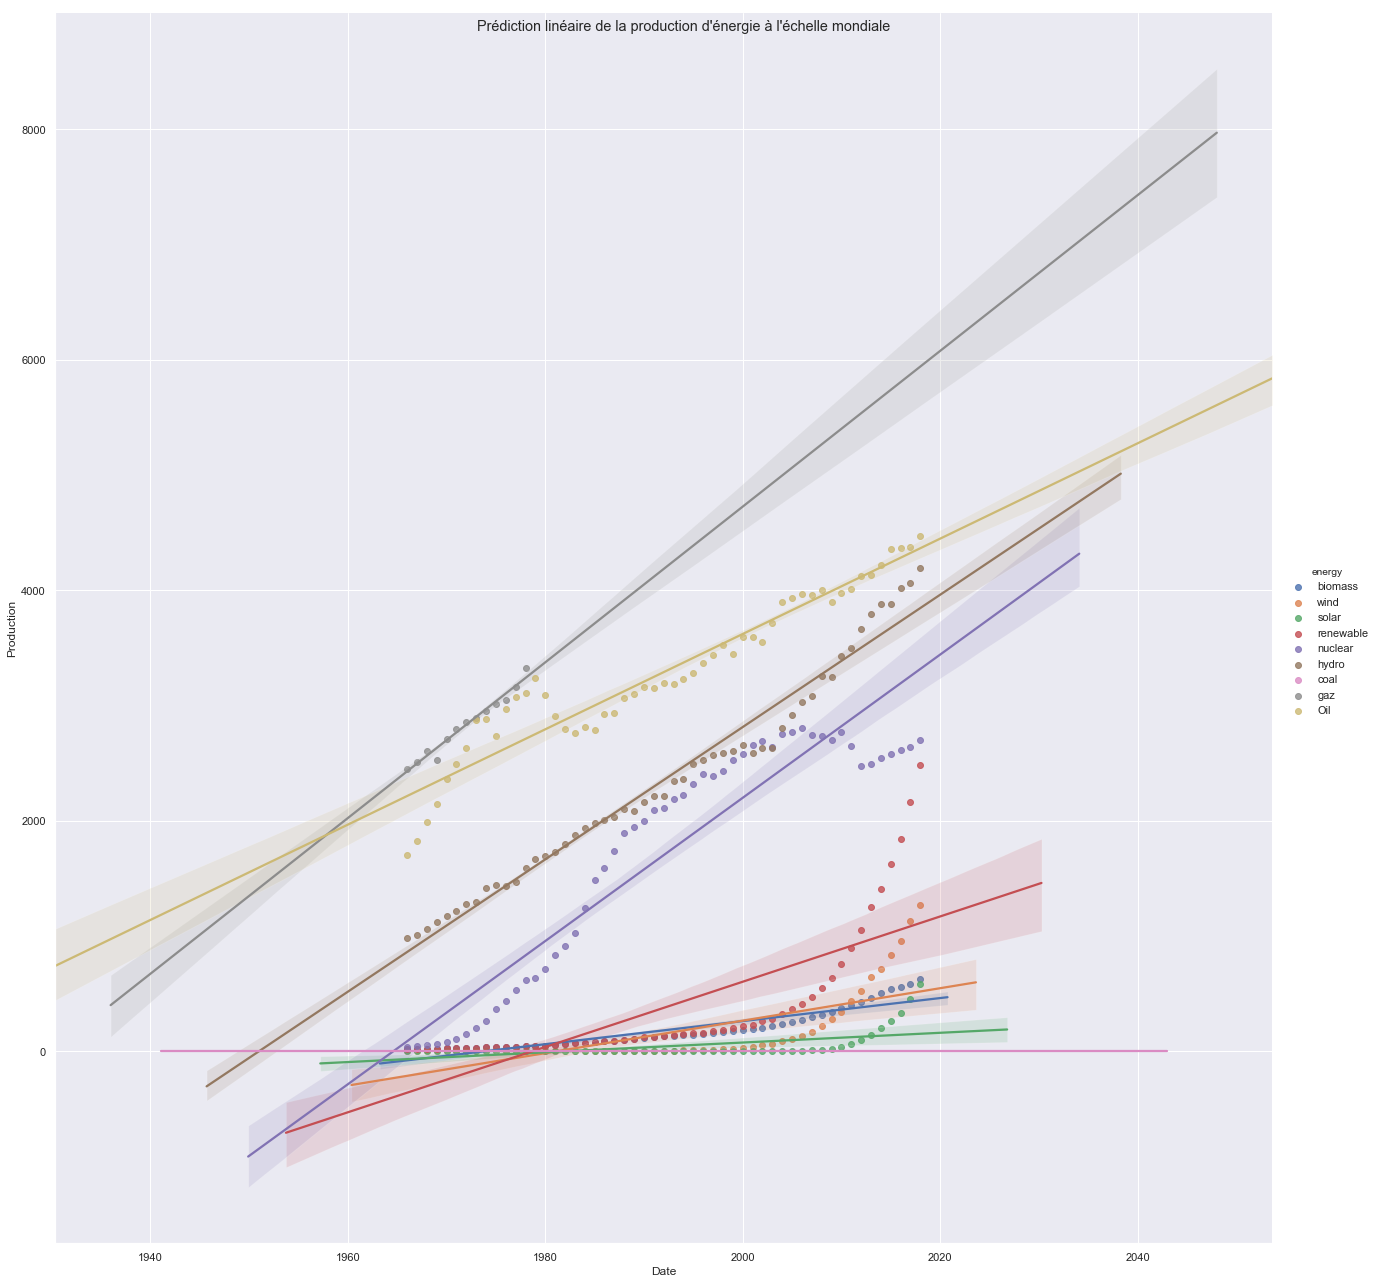

In [19]:
import seaborn as sns; sns.set(color_codes=True)
t=t[t["variable"]=="Total World"]

g = sns.lmplot(x="Date", y="Production", hue="energy", data=t, height=18).fig.suptitle("Prédiction linéaire de la production d'énergie à l'échelle mondiale")
